# Web Traffic Times Series Forcasting

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Machine learning\\Time Series\\Web traffic'

In [6]:
df=pd.read_csv("web traffic.csv",header=0)        # by deafult header=0 
df.head()

,website,time,visits
0,A,2014/1/6 00:00,26
1,A,2014/1/6 00:01,35
2,A,2014/1/6 00:02,26
3,A,2014/1/6 00:03,26
4,A,2014/1/6 00:04,26


In [7]:
df.shape

(1048575, 3)

In [8]:
df.describe()

,visits
count,1.048575e+06
mean,2.048058e+02
std,1.195883e+04
min,6.000000e+00
25%,4.300000e+01
50%,5.700000e+01
75%,7.700000e+01
max,9.999990e+05


In [9]:
df.isnull().sum()

website    0
time       0
visits     0
dtype: int64

In [10]:
df.dtypes

website    object
time       object
visits      int64
dtype: object

In [11]:
# Split the date and the time component

df['date'] = pd.to_datetime(df['time']).dt.date

In [12]:
df

,website,time,visits,date
0,A,2014/1/6 00:00,26,2014-01-06
1,A,2014/1/6 00:01,35,2014-01-06
2,A,2014/1/6 00:02,26,2014-01-06
3,A,2014/1/6 00:03,26,2014-01-06
4,A,2014/1/6 00:04,26,2014-01-06
...,...,...,...,...
1048570,A,2016/10/25 04:10,74,2016-10-25
1048571,A,2016/10/25 04:11,71,2016-10-25
1048572,A,2016/10/25 04:12,76,2016-10-25
1048573,A,2016/10/25 04:13,73,2016-10-25


The date and time has been splitted into separate columns time and date.`

In [13]:
# convert date datatype to date time variable
df['date']=pd.to_datetime(df['date'])

In [14]:
df.dtypes

website            object
time               object
visits              int64
date       datetime64[ns]
dtype: object

In [15]:
# creating a new datafroame with date and visit
traffic= df[['date','visits']]

In [16]:
traffic

,date,visits
0,2014-01-06,26
1,2014-01-06,35
2,2014-01-06,26
3,2014-01-06,26
4,2014-01-06,26
...,...,...
1048570,2016-10-25,74
1048571,2016-10-25,71
1048572,2016-10-25,76
1048573,2016-10-25,73


In [17]:
traffic

,date,visits
0,2014-01-06,26
1,2014-01-06,35
2,2014-01-06,26
3,2014-01-06,26
4,2014-01-06,26
...,...,...
1048570,2016-10-25,74
1048571,2016-10-25,71
1048572,2016-10-25,76
1048573,2016-10-25,73


In [18]:
traffic = traffic.sort_values('date', ascending=True)
#furniture.isnull().sum()

In [19]:
traffic

,date,visits
0,2014-01-06,26
964,2014-01-06,38
963,2014-01-06,44
962,2014-01-06,42
961,2014-01-06,43
...,...,...
1048410,2016-10-25,74
1048411,2016-10-25,85
1048412,2016-10-25,72
1048446,2016-10-25,75


In [20]:
traffic['date']=pd.to_datetime(traffic['date'])

In [21]:
traffic.date.value_counts()

2014-01-06    1440
2015-11-09    1440
2015-11-11    1440
2015-11-12    1440
2015-11-13    1440
              ... 
2014-12-16    1440
2014-12-17    1440
2014-12-18    1440
2014-12-19    1440
2016-10-25     255
Name: date, Length: 729, dtype: int64

In [23]:
traffic.shape

(1048575, 2)

In [140]:
#traffic = traffic.groupby('date')['visits'].sum().reset_index()

In [141]:
#traffic

In [24]:
traffic = traffic.set_index('date')

In [25]:
traffic

,visits
date,
2014-01-06,26
2014-01-06,38
2014-01-06,44
2014-01-06,42
2014-01-06,43
...,...
2016-10-25,74
2016-10-25,85
2016-10-25,72


In [107]:
y =  traffic ['visits'].resample('').mean()   

In [108]:
print(y.shape)
y

(147,)


date
2014-01-12    32.037917
2014-01-19    34.306806
2014-01-26    34.809722
2014-02-02    34.616806
2014-02-09    34.684444
                ...    
2016-10-02    94.247222
2016-10-09    89.271944
2016-10-16    97.045556
2016-10-23    97.966528
2016-10-30    97.811209
Freq: W-SUN, Name: visits, Length: 147, dtype: float64

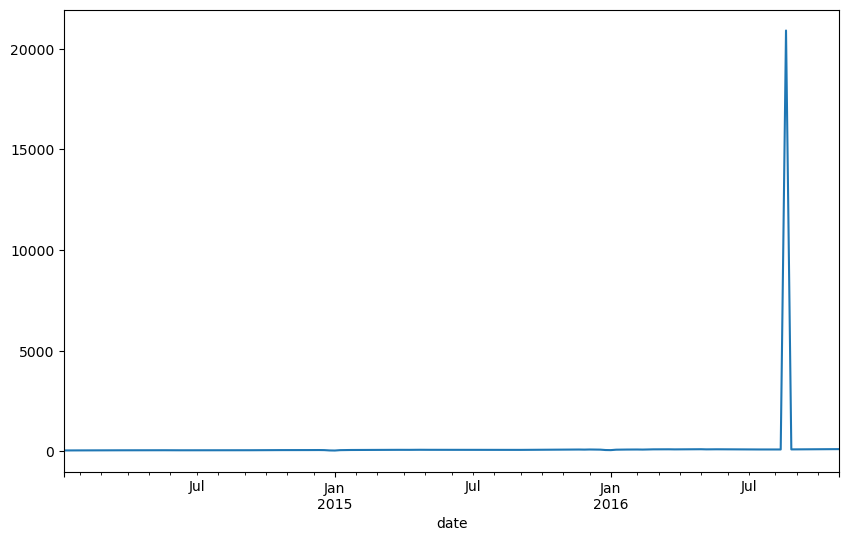

In [109]:
y.plot(figsize=(10,6))
plt.show()

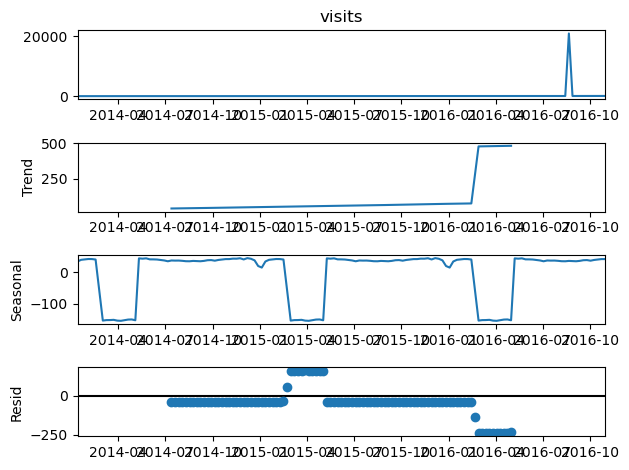

In [45]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

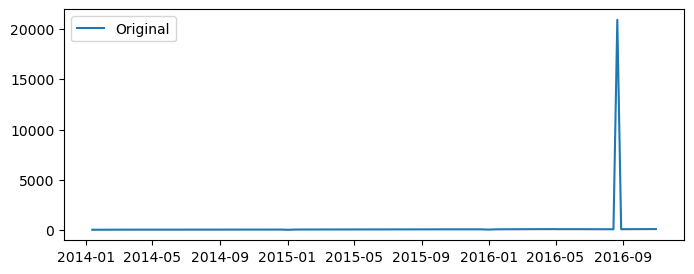

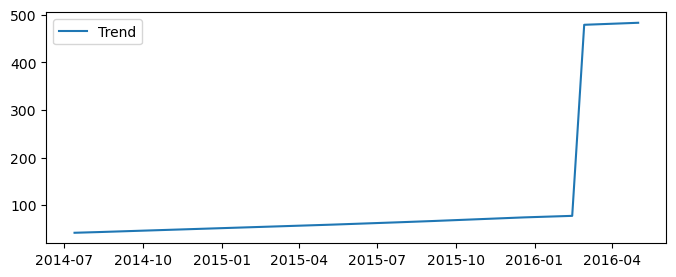

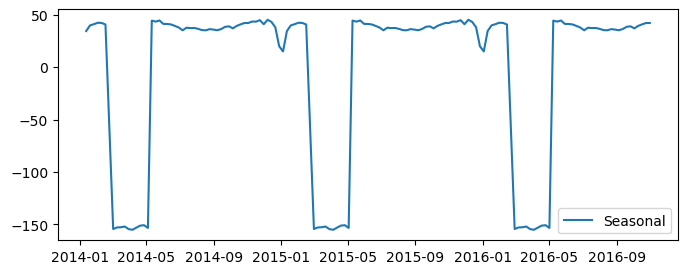

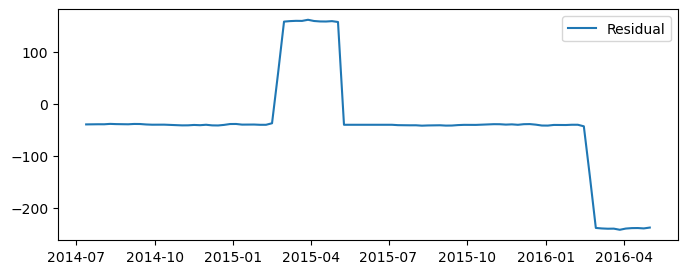

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

 
plt.figure(figsize=(8,3))
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.figure(figsize=(8,3))
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.figure(figsize=(8,3))
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.figure(figsize=(8,3))
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<a id="Checking_Stationarity"></a>
##  Checking Staionarity

## ADF Test

**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [48]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.058174
p-value: 0.000000
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


Rejecting the null hypothesis as p value is less than 0.05 . So data is stationary

### Model Building

In [122]:
!pip install pmdarima


     ---------------------------------------- 0.0/615.0 kB ? eta -:--:--
     ------------------------------------  614.4/615.0 kB 19.5 MB/s eta 0:00:01
     ------------------------------------- 615.0/615.0 kB 12.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------- ----------------------------- 0.7/2.8 MB 23.1 MB/s eta 0:00:01
     --------------------- ------------------ 1.5/2.8 MB 23.9 MB/s eta 0:00:01
     ------------------------------- -------- 2.2/2.8 MB 19.7 MB/s eta 0:00:01
     ---------------------------------------  2.7/2.8 MB 17.4 MB/s eta 0:00:01
     ---------------------------------------- 2.8/2.8 MB 14.8 MB/s eta 0:00:00


In [52]:
import itertools
p = d = q = [0,1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='Parameter_Selection'></a>
##  Parameter Selection 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
result_dict = {}
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            result_dict[round(results.aic,0)] = str(param)+str(param_seasonal)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2593.7688187633003
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2394.1059556463933
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2390.9285321734405
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2190.4373016050968
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2407.645149509675
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2392.8065239837842
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2207.3547891034214
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2192.4360499883974
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2579.011638965524
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2379.6050762528675
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2376.1086447926236
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2175.511524086953
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2409.6781058048177
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2377.948844050882
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2209.604156264266
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2177.5106217949315
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2676.1873490846147
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2468.35190609930

In [78]:
print(len(result_dict))

print(sorted(result_dict.keys()))
result_dict[2159]

52
[2159.0, 2161.0, 2165.0, 2176.0, 2178.0, 2180.0, 2190.0, 2192.0, 2194.0, 2195.0, 2207.0, 2210.0, 2225.0, 2227.0, 2257.0, 2259.0, 2275.0, 2363.0, 2365.0, 2366.0, 2367.0, 2376.0, 2378.0, 2380.0, 2381.0, 2382.0, 2383.0, 2391.0, 2393.0, 2394.0, 2395.0, 2396.0, 2397.0, 2398.0, 2408.0, 2410.0, 2430.0, 2432.0, 2433.0, 2434.0, 2466.0, 2468.0, 2470.0, 2486.0, 2565.0, 2567.0, 2579.0, 2581.0, 2594.0, 2596.0, 2636.0, 2676.0]


'(0, 1, 1)(0, 1, 1, 12)'

**We are selecting those parameter which has minimum AIC score**

<a id='Fitting_the_ARIMA'></a>
##  Fitting the ARIMA model

In [79]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0197      0.009   -119.421      0.000      -1.036      -1.003
ma.S.L12       0.1686      6.453      0.026      0.979     -12.480      12.817
sigma2      3.129e+06   2.87e-06   1.09e+12      0.000    3.13e+06    3.13e+06


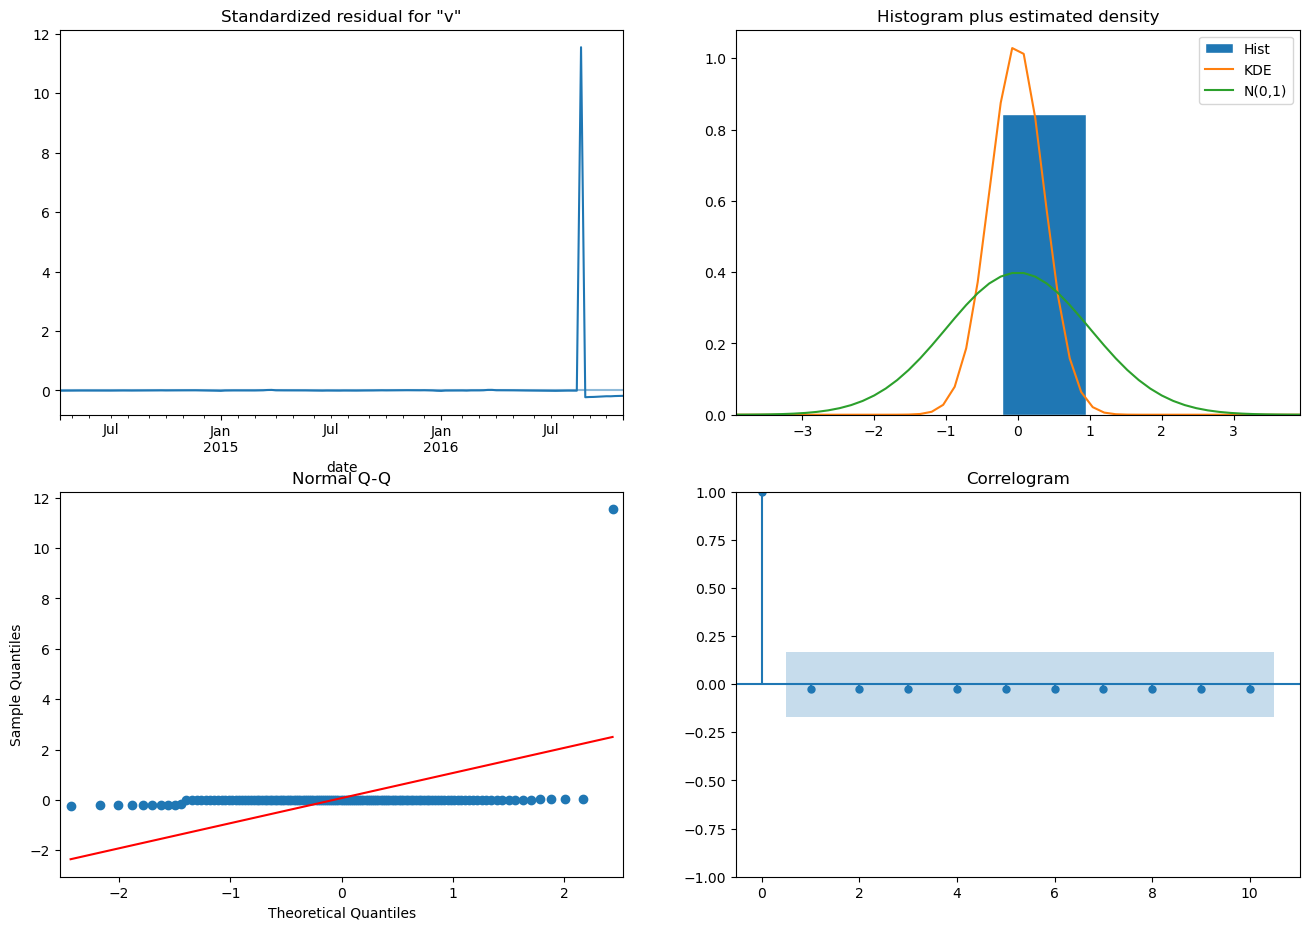

In [80]:
results.plot_diagnostics(figsize=(16, 11))
plt.show()

## FORECAST

In [89]:
y.index[-40]


Timestamp('2016-01-31 00:00:00', freq='W-SUN')

In [81]:
y.head()

date
2014-01-12    32.037917
2014-01-19    34.306806
2014-01-26    34.809722
2014-02-02    34.616806
2014-02-09    34.684444
Freq: W-SUN, Name: visits, dtype: float64

In [83]:
y.tail()

date
2016-10-02    94.247222
2016-10-09    89.271944
2016-10-16    97.045556
2016-10-23    97.966528
2016-10-30    97.811209
Freq: W-SUN, Name: visits, dtype: float64

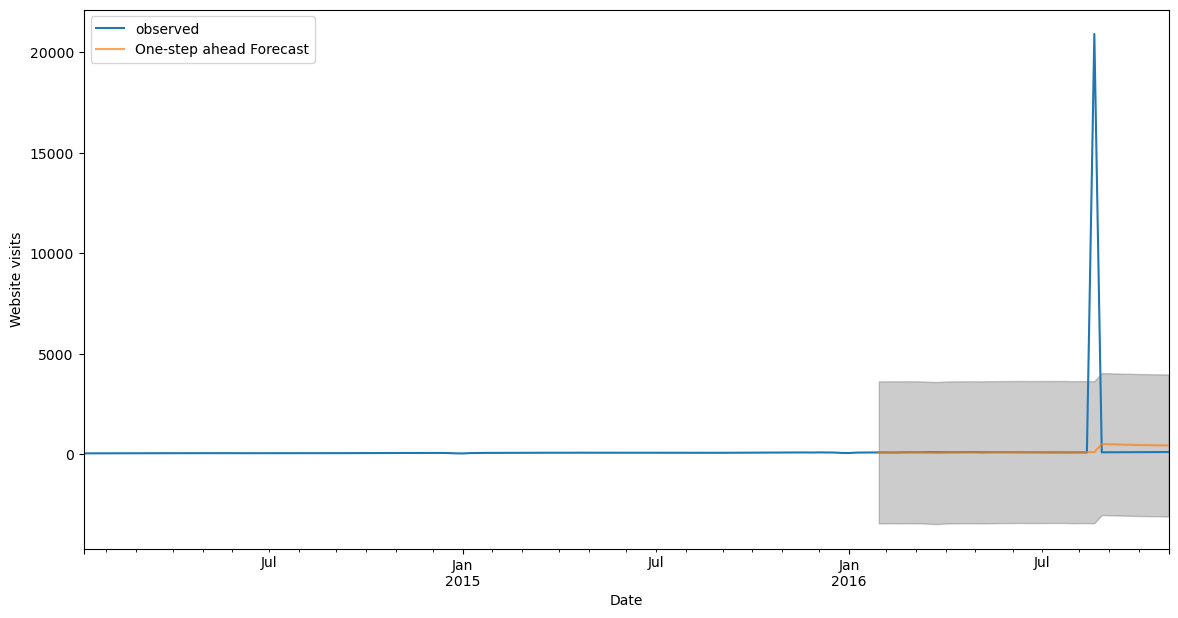

In [117]:
#set forecasts to start at 2019–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')


pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Website visits')
plt.legend()
plt.show()

<Axes: xlabel='date'>

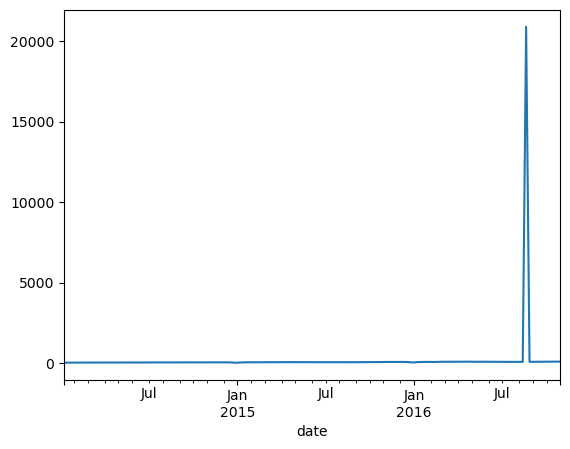

In [95]:
y.plot()

<a id="Calculating_MSE_and_RMSE"> </a>
##  Calculating MSE and RMSE


In [112]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 10871747.0
The Root Mean Squared Error of our forecasts is 3297.23


In [118]:
from sklearn.metrics import r2_score
r2_score(y_forecasted,  y_truth)

-422.37677229591003

<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 


            lower visits  upper visits
2016-11-06  -3118.170240   3952.374835
2016-11-13  21225.853942  28297.712456
2016-11-20  -3114.191760   3958.979948
2016-11-27  -3112.536155   3961.948503
2016-12-04  -3114.345312   3961.452053
2016-12-11  -3112.472246   3964.637582
2016-12-18  -3105.381975   3973.040073
2016-12-25  -3103.755997   3975.978027
2017-01-01  -3110.881045   3970.164712
2017-01-08  -3102.553824   3979.803425
2017-01-15  -3102.376478   3981.292018
2017-01-22  -3102.994109   3981.985393
2017-01-29  -4681.909949   6307.171368
2017-02-05  19660.783952  30653.839271
2017-02-12  -4680.591437   6316.436449
2017-02-19  -4680.264923   6320.734094
2017-02-26  -4683.402575   6321.566140
2017-03-05  -4682.857412   6326.079571
2017-03-12  -4677.094449   6335.809371
2017-03-19  -4676.795187   6340.074042
2017-03-26  -4685.246360   6335.586851
2017-04-02  -4678.244672   6346.551096
2017-04-09  -4679.392269   6349.364632
2017-04-16  -4681.334252   6351.382360


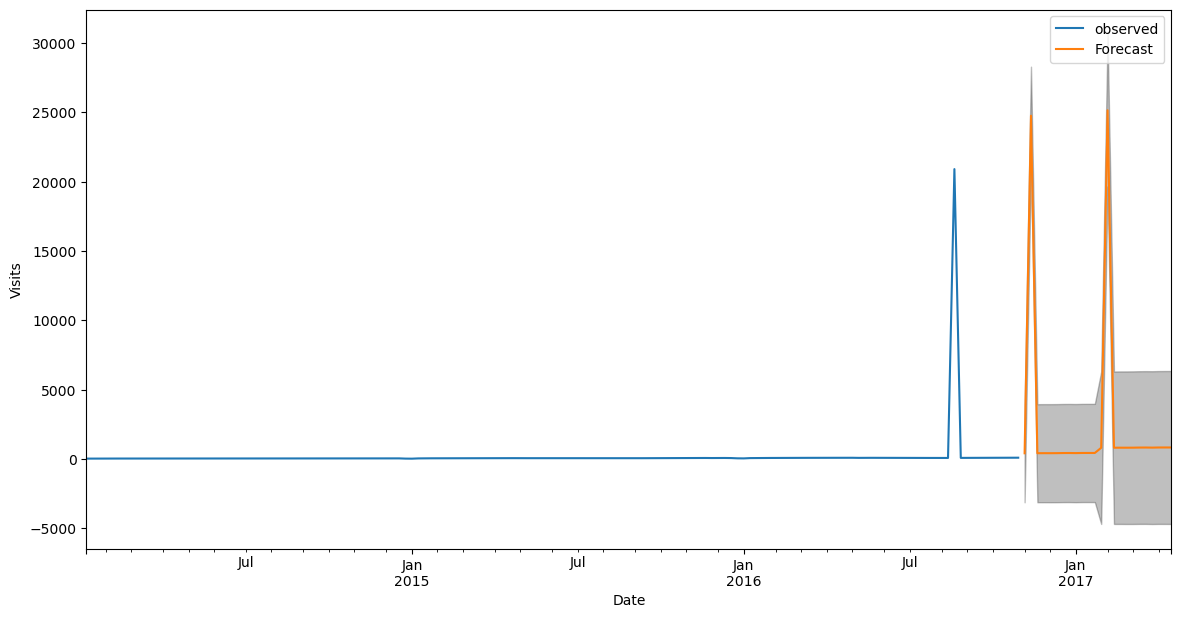

In [116]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Visits')
print(pred_ci)
plt.legend()
plt.show()

In [121]:
y

date
2014-01-12    32.037917
2014-01-19    34.306806
2014-01-26    34.809722
2014-02-02    34.616806
2014-02-09    34.684444
                ...    
2016-10-02    94.247222
2016-10-09    89.271944
2016-10-16    97.045556
2016-10-23    97.966528
2016-10-30    97.811209
Freq: W-SUN, Name: visits, Length: 147, dtype: float64

In [ ]:
AUTO ARIMA MODEL

In [123]:
y.head()

date
2014-01-12    32.037917
2014-01-19    34.306806
2014-01-26    34.809722
2014-02-02    34.616806
2014-02-09    34.684444
Freq: W-SUN, Name: visits, dtype: float64

In [125]:
y.index

DatetimeIndex(['2014-01-12', '2014-01-19', '2014-01-26', '2014-02-02',
               '2014-02-09', '2014-02-16', '2014-02-23', '2014-03-02',
               '2014-03-09', '2014-03-16',
               ...
               '2016-08-28', '2016-09-04', '2016-09-11', '2016-09-18',
               '2016-09-25', '2016-10-02', '2016-10-09', '2016-10-16',
               '2016-10-23', '2016-10-30'],
              dtype='datetime64[ns]', name='date', length=147, freq='W-SUN')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2618.670, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2610.453, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2612.453, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2612.505, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2610.514, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2614.504, Time=0.61 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.225 seconds


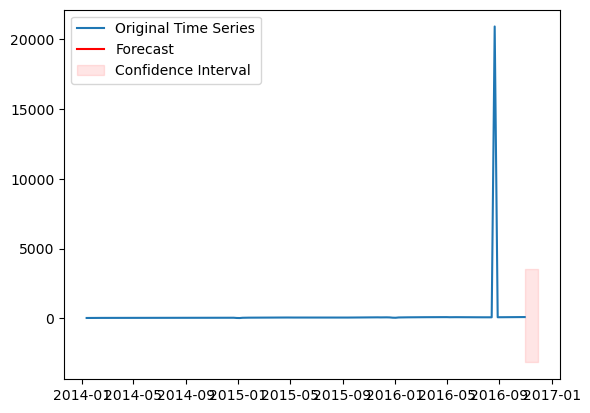

In [127]:
# Use auto_arima to automatically select ARIMA parameters
autoarima_model = auto_arima(y, trace=True, suppress_warnings=True)

# Fit the model
autoarima_model.fit(y)

# Generate predictions for the next n periods
n_periods = 30  # Adjust this according to your needs
forecast, conf_int = autoarima_model.predict(n_periods=n_periods, return_conf_int=True)

# Calculate the start date for the forecast
forecast_start_date = y.index[-1] + pd.DateOffset(1)

# Create a DataFrame with the forecast and confidence intervals
forecast_index = pd.date_range(start=forecast_start_date, periods=n_periods, freq='D')
forecast_df = pd.DataFrame({'forecast': forecast, 'lower_conf_int': conf_int[:, 0], 'upper_conf_int': conf_int[:, 1]}, index=forecast_index)

# Plot the original time series and the forecast
plt.plot(y.index, y, label='Original Time Series')
plt.plot(forecast_df.index, forecast_df['forecast'], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['lower_conf_int'], forecast_df['upper_conf_int'], color='red', alpha=0.1, label='Confidence Interval')
plt.legend()
plt.show()